## Setup

In [1]:
from imagegrains import data_loader, segmentation_helper, plotting
import matplotlib.pyplot as plt
from cellpose import models, io

import os
import numpy as np

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

## Input

In [2]:
## set up pathsD:\Bennet_Schuster\3D
model_path = f'D:/Bennet_Schuster/models/DV_6/IG2_DV_6_CT.160724' #replace with path to model file 
model_id = 'IG2_DV_6_CT'
stack_path = 'D:/Bennet_Schuster/3D/CTscan_BO_Mgt_5068_1_C_174_1.tif' #replace with path to tif stack 

## set filters
filters = {'edge':[False,.1],'px_cutoff':[True,6]} #optional: filters; by default set for px_cutoff = 6

## Load model and tif stack

In [3]:
## initialize model
model = models.CellposeModel(gpu=True, pretrained_model=model_path)

In [4]:
## load tif stack
stack = io.imread(f'{stack_path}')

100%|█████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:01<00:00, 965.07it/s]


## Run inference with different scales (=diameter)  

By default, the all nuclei- based models have been trained on with a median diameter of 17 px (diameter = 17; or None). Therfore, diameter < 17 will upsample images and values > 17 will downscale images accordingly. 

In [5]:
## define large diameter
large_diameter = 34

In [6]:
## run for regular scale
masks1, _, _ = model.eval(stack,do_3D=True,diameter = None)

## run for larger grains
masks2, _, _ = model.eval(stack,do_3D=True,diameter = large_diameter)

In [7]:
## save the predictions to existing folder
#io.imsave('E:/Bennet/first_demo/demo_small_pred.tif',masks1)
#io.imsave('E:/Bennet/first_demo/demo_large_pred.tif',masks2)

number of grains in masks1: 4728


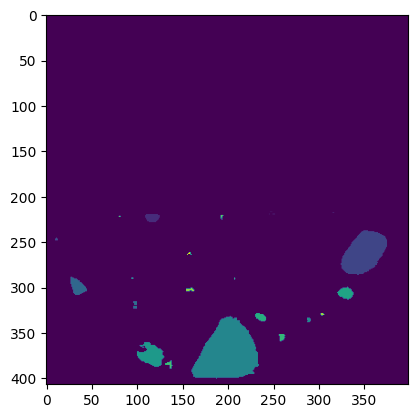

In [8]:
## plot one slice to check
plt.imshow(masks1[3]);
print('number of grains in masks1:',len(np.unique(masks1)))

number of grains in masks2: 751


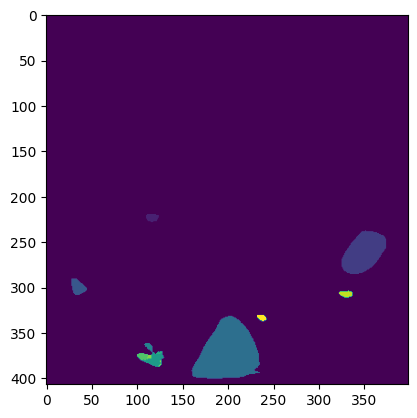

In [9]:
plt.imshow(masks2[3]);
print('number of grains in masks2:',len(np.unique(masks2)))

## Combine predictions  
By default, grains from `masks2` wil have priority over smaller grains from `masks1`.  
  
We have several options here:  
`stack_3D=True`: Flag to do 3D combination.  
`threshold`: Optional size value in px. If provided, all grains < threshold will be kept for `masks1` and all grains > threshold will be kept for `masks2`; **all other grains will be deleted!**  
`remove_intersecting`: Flag to remove any smaller grains from `masks1` that are only partly intersecting with grains from `masks2`.  
`filters`: Filters (edge and px-cutoff) can be used as usual (e.g., set `filters = filters` to use filters defined above).  
`file_name`: Designated file name (model_id and 'pred_combined' will be added automatically)  
`tar_dir`: Optional different output path; if not provided, output will be stored in the current working directory.

In [11]:
segmentation_helper.combine_preds(masks1,masks2,stack,model_id=model_id,
              filters=None,mute=True,stack_3D=True,threshold=None,
              remove_intersecting=True,file_name='CTscan_BO_Mgt_5068_1_C_174_1',
              tar_dir='D:/Bennet_Schuster')

Combining predictions for 1024 images:


CTscan_BO_Mgt_5068_1_C_174_1: 1024slice [00:01, 533.52slice/s]
